In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATASET_PATH = "UCI HAR Dataset"
 

In [2]:
import os
os.getcwd()


'/home/akshat-baranwal/Desktop/har-system'

In [3]:
X_train = pd.read_csv(
    f"{DATASET_PATH}/train/X_train.txt",
    sep=r"\s+",
    header=None
)

y_train = pd.read_csv(
    f"{DATASET_PATH}/train/y_train.txt",
    sep=r"\s+",
    header=None,
    names=["activity"]
)

subjects_train = pd.read_csv(
    f"{DATASET_PATH}/train/subject_train.txt",
    sep=r"\s+",
    header=None,
    names=["subject"]
)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(subjects_train.shape)


(7352, 561)
(7352, 1)
(7352, 1)


In [5]:
df = X_train.copy()
df["activity"] = y_train["activity"]
df["subject"] = subjects_train["subject"]


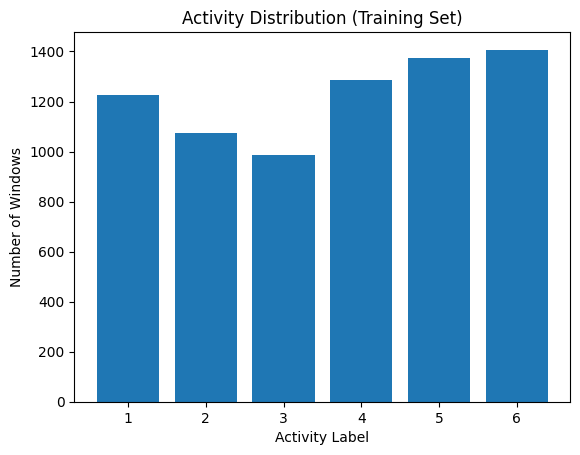

In [6]:
import matplotlib.pyplot as plt
activity_counts = df["activity"].value_counts().sort_index()

plt.figure()
plt.bar(activity_counts.index, activity_counts.values)
plt.xlabel("Activity Label")
plt.ylabel("Number of Windows")
plt.title("Activity Distribution (Training Set)")
plt.show()


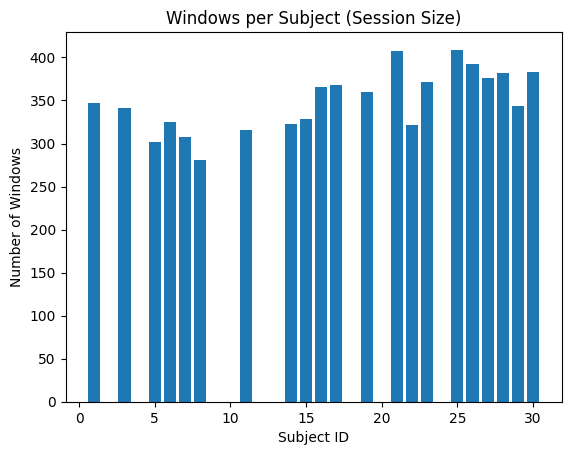

In [7]:
subject_counts = df["subject"].value_counts().sort_index()

plt.figure()
plt.bar(subject_counts.index, subject_counts.values)
plt.xlabel("Subject ID")
plt.ylabel("Number of Windows")
plt.title("Windows per Subject (Session Size)")
plt.show()


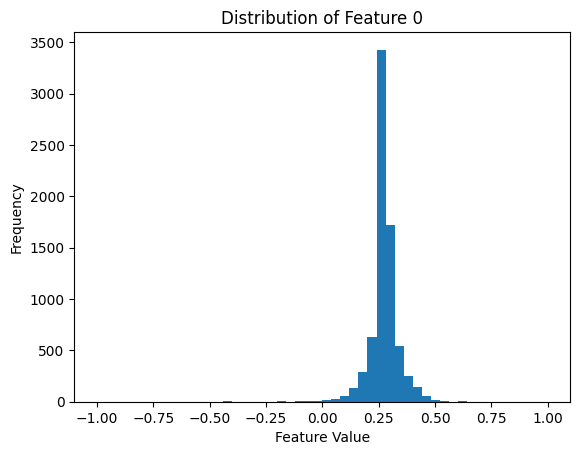

In [8]:
feature_idx = 0  # first feature

plt.figure()
plt.hist(X_train.iloc[:, feature_idx], bins=50)
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title(f"Distribution of Feature {feature_idx}")
plt.show()


In [9]:
subject_id = 1
subject_df = df[df["subject"] == subject_id].copy()


In [10]:
WINDOW_SIZE = 2.56
WINDOW_STEP = 1.28

subject_df["window_index"] = np.arange(len(subject_df))
subject_df["start_time"] = subject_df["window_index"] * WINDOW_STEP


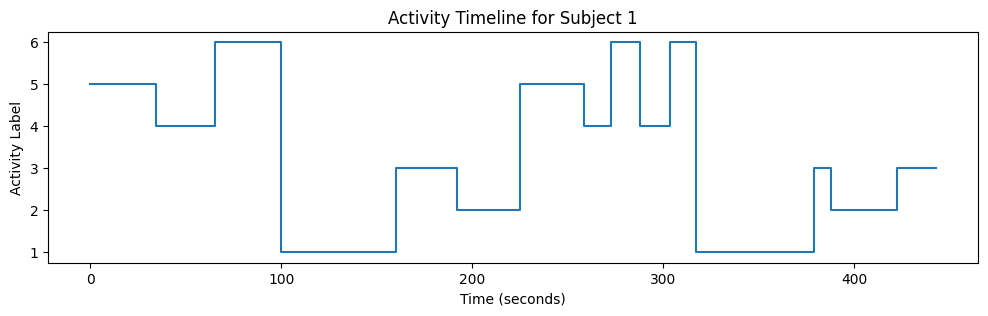

In [11]:
plt.figure(figsize=(12, 3))
plt.plot(subject_df["start_time"], subject_df["activity"], drawstyle="steps-post")
plt.xlabel("Time (seconds)")
plt.ylabel("Activity Label")
plt.title(f"Activity Timeline for Subject {subject_id}")
plt.show()


In [23]:
subset = X_train.iloc[:, :30]

corr_matrix = subset.corr()


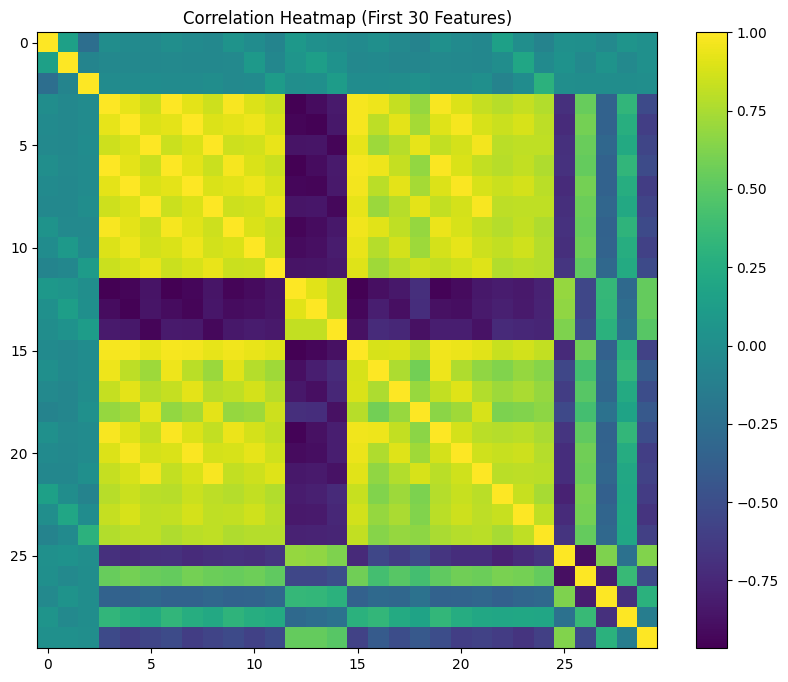

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap (First 30 Features)")
plt.show()


In [15]:
feature_target_corr = X_train.corrwith(y_train["activity"]).abs()

top_corr = feature_target_corr.sort_values(ascending=False).head(10)
top_corr


104    0.859450
102    0.857454
367    0.853579
103    0.853425
234    0.847651
366    0.844660
184    0.842934
288    0.839824
368    0.832396
523    0.829469
dtype: float64

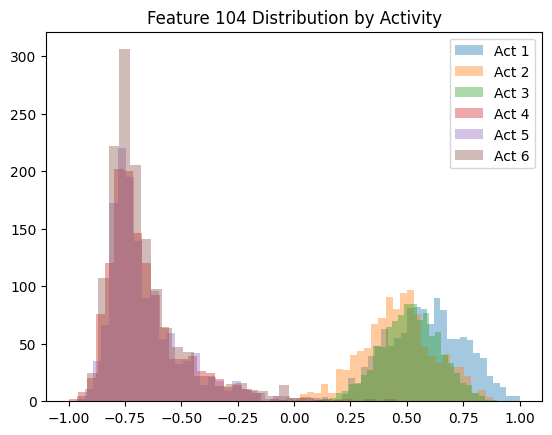

In [16]:
feature_idx = top_corr.index[0]

plt.figure()
for activity in sorted(df["activity"].unique()):
    subset = df[df["activity"] == activity]
    plt.hist(subset.iloc[:, feature_idx], bins=30, alpha=0.4, label=f"Act {activity}")

plt.legend()
plt.title(f"Feature {feature_idx} Distribution by Activity")
plt.show()


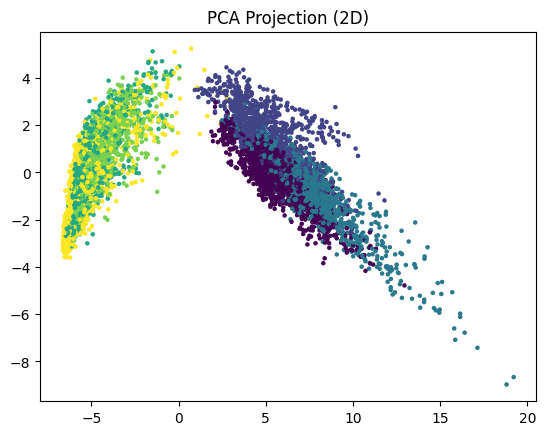

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train["activity"], s=5)
plt.title("PCA Projection (2D)")
plt.show()


In [21]:
feature_variance = X_train.var()
low_variance = feature_variance[feature_variance < 0.001]

len(low_variance)


0

In [22]:
import numpy as np

high_corr_pairs = np.where(np.abs(corr_matrix) > 0.9)
list(zip(high_corr_pairs[0], high_corr_pairs[1]))[:10]


[(np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(2), np.int64(2)),
 (np.int64(3), np.int64(3)),
 (np.int64(3), np.int64(4)),
 (np.int64(3), np.int64(6)),
 (np.int64(3), np.int64(7)),
 (np.int64(3), np.int64(9)),
 (np.int64(3), np.int64(12)),
 (np.int64(3), np.int64(13))]